# Boston Bike Share Data

This project uses data from [Blue Bikes](https://www.bluebikes.com/system-data), the bike sharing program in Boston. The website contains all trip histories for customers over all time. Generally, interesting questions to consider looking into relate to what the customer-base looks like:

* Who uses the bikes for commuting to work vs fun? Can you determine where each of these happens most? What are the attributes of trips taken during the week vs weekend? What does usage look like across the seasons?
* Profile the users by trip duration and trip distance (between stations). How much can we understand about what the person did on the trip just from know the beginning and end.
* "Is bike share use preventing drunk driving?". That is, can you tell if people use bikes to going out to bars and restaurants? When might this happen? Who might be using the bikes for these activities? While this is at heart a casual question, investigating associations is the first step toward answering the question.
* For all of the above questions, what is the gender/age of the bike share users doing these activity? Can you infer anything about who is doing what?

### Getting the data

The data is available on [this website](https://s3.amazonaws.com/hubway-data/index.html). You should use trip data between (and including) 2018-05 to 2019-03. 

* Use the fact that `pd.read_csv` can read in both `zip` files, as well as urls.
* Once the data is downloaded, write it to a local file so you don't have to download the data repeatedly.

### Cleaning the data and descriptive statistics

* Clean the data.
* Understand the data in ways relevant to your question, using univariate and bivariate analysis of the data, as well as aggregations.

*Tips:*
* To measure distances between two lat/long pairs, use [the haversine distance formula](https://gist.github.com/rochacbruno/2883505) -- in the comments, someone also provides a Numpy-vectorized formula.
* If you'd like to try plotting your statistics on a map, try [Folium](https://blog.dominodatalab.com/creating-interactive-crime-maps-with-folium/).

### Missingness

While the dataset has no empty entries, both the `age` and `birth year` columns certainly contain missing data, as they are self-reported. You must:

1. Figure out which rows likely contain "missing" data for `age` and `birth year` and blank them out.
2. Assess the missingness of `age` and/or `birth year`.

### Hypothesis Test

Find a hypothesis test to perform. You can use the questions at the top of the notebook for inspiration.


data collection:
in Boston, Brookline and Somerville, and Cambridge


price:

-----------------------
single trip： $ 2.5

for each 30 min

-----------------------
in 24 hour: $ 10

2 hour maximum per trip
any additional 30 minutes costs:   $2.5

-----------------------
year_pass: $99

as many trip as possible:
first 45min of each trip is free
any additional 30 minutes costs:   $2.5

-----------------------
The fee for a lost or stolen bike is $1,200

-----------------------
method to buy ticket: 
on phone
on station kiosk


---
# Summary of Findings

这部分在project03.ipynb里面也有指导，下面是我的思路。


## Introduction
---

选取一个有价值的问题，然后回答，下面是老师的例子:
1. Profile the users by trip duration and trip distance (between stations). How much can we understand about what the person did on the trip just from know the beginning and end 
我的思路是，回答这个问题：
什么样的用户会骑得更久？（与年龄是否有联系？与出发地点是否有关系？与出发时间是否有联系？与季节是否有联系？与性别是否有关系？什么样的指标会预示着形成更久？）你看着选3-5个回答一下吧（要结合下面的EDA，画图+数据清洗）。
要回答这个问题，有好多数据清晰需要做！一定要非常好的体现出数据清洗的原因和过程，不要简单的删掉，能保留的数据一定要保留，然后，数据的消失的原因你得探究一下，看看与年龄啊，自行车的id啊，时间啊，地点啊，是否有联系！

一定要做的比我想到的都好！！

重点看一下 project03.ipynb里面的The Data Processing and Analysis

不过在给我的introduction部分里，介绍一下你的过程就行。中英文都可以，混着打也可以。


### Results of Cleaning and EDA:
---
Clean the data appropriately for your question (e.g. replace data that should be missing with NaN, create new columns out of given ones -- e.g. compute distances, scale data, get time information from time stamps).
Univariate Analysis: look at the statistics of relevant columns separately (e.g. their distribution and statistics) using tables and appropriate plots.
Bivariate Analysis: look at the statistics of pairs of columns to identify possible associations. Use scatterplots, plot conditional distributions, box-plots, etc. Also, you should examine and plot pivot tables. This will best inform interesting hypothesis tests!
Interesting Aggregates: Choose columns to group-by and examine aggregate statistics.

Cleaning:
We first assess the extreme trip duration. By relating to data generating process, we know that the bike is usually meant to be returned within a day, or a few hours. So we tried a few cutoffs, 24 hours, 8 hours, and 3 hours. We used 8 hours for cutoff, any trip duration that is longer than 8 hours is assigned nan. The minimum trip duration is 61 seconds, we think this number still makes sense because some people just rented and returned right away, and they are still valid data.

For birth year/age, it's tricky because there are two kinds of missingness. Some birth years are really early, they occur because uses chose it recklessly. We created new column called age by substracting year by 2019. Then we use value_counts to find the best cutoff age to be 79 years old because we can preserve the most number as well as include the possible older riders. 

For birth year at 1969, there's an usuaul peak. This is caused by Unix Stamp starting time, which might be assigned default to a lot of customers who didn't enter birth year when renting the bike. By using a groupby method, we can found that it's almost exclusively that all customer riders with birth year 1969 should be assigned Nan. Then, in order to preserve the group of customer who were indeed born at 1969, I used that of proportion in subscriber data to impute age 50 conditionally on customer riders. That way, after assigning nan and imputation, the age distributiom make senses, and both groups of customer and subscriber have similar age distribution. 

I also created columns like age, month, year, distance, and even speed(in hypothesis test) to help the calculation and generate useful information. 



### Results of Missingness:
---

We want to investigate the type of age missingness user type. In the code section below, we have four graphs. The first graph shows  User Type vs Age Missing. It's obvious that two distributions are not the same because it's much more likely for customers to have missing age rather than subscribers, which makes sense because customer might not need to input age in order to rent a bike.

The second graph shows trip range vs missing age. Trip range is defined as how long the user rides the bike. short is below 15 minutes, mid is between 15 to 60 minutes, otherwise, long trip.
We cansee that in long trip, age missingness is more likely to occur, because those who don't have age are customers who don't use the bike a lot, and they tend to forget to return the bike on time. For short trip, the missingness of age is less likely to occur, because subscribers tend to ride short range and they already input their name in signup page.

The third graph shows month vs missing age. It can be found that during summer, missingnes of age is more likely to occur than winter. This might because summer is vacation time and there are tourists who rent the bike but don't input their age.

The last graph shows gender vs missing age. Gender 0 (other) is highly associated with missingness of age because they tend to miss together as the default data if there's no input.

From the first permuation test, I tested Age missing vs user type. The result reconfirmed our findings in graph as it's very likely for the two distrbutions to be the same. So we can state that missingness depends on user type.

From the second permuation test, I teted if missingness of age depends on bikeid. The result shows that missingness is not dependent on bikeid. 

Thus, relating to our questions, we can observe a difference in our users that users that are customers are less likely to have age recorded, short-trips users are more likely to have age recorded, tourists users are less likely to have age recorded.



### Results of Hypothesis Test
---
Formulate a hypothesis and perform a hypothesis test. You can use the "sample lines of inquiry" in each project notebook for inspiration or you can create your own.
Be sure to explicitly state the (null and alternative) hypothesis, the test-statistic, the significance level, the resulting p-value and results. Justify why these choices are good choices for answering the question you are trying to answer.

We are interested in investigating whether customers ride their bikes faster than subscribers because they don't want to waste to much money during the trip. Whereas, subscribers don't really care so they don't ride very fast.

So we conducte hypothesis test. 

Null hypothesis: Subscribers and Customers can ride bike at approximately same speed.
Alternative hypothesis: Customers rike bikes faster than Subscribers.
Test-statistic: Subscribers' average speed, which is 9.9 mile/hour
significance level: 0.05
Resulting p-value: larger than 0.05(around 0.3)

Since the p-value is larger than 0.05, we cannot reject the null that Subscribers and Customers ride bike at approximately same speed.

The result shows that there might no speed difference between subcriber and customer, so it answers our question that customers don't tend to speed up their biking. Thus, whether the users are subscribed or not, they are not likely to ride the bike faster in order to save money. Also, another speculation is, since the trip fee is calculated every 30 minutes, so the riders almost always have enough time to transport, so they don't have to speed up and they always have to pay the base fee($2.5 for 30 minutes), since the median trip duration is around 13 minutes.



---

# Your Code Starts Here

In [1]:
%matplotlib inline
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from IPython.display import Markdown
from scipy.stats import poisson

### Cleaning and EDA:
---

In [28]:
raw_df = pd.read_csv('201808-bluebikes-tripdata.csv')

In [3]:
raw_df.isna().any() # no NaN value is found

tripduration               False
starttime                  False
stoptime                   False
start station id           False
start station name         False
start station latitude     False
start station longitude    False
end station id             False
end station name           False
end station latitude       False
end station longitude      False
bikeid                     False
usertype                   False
birth year                 False
gender                     False
dtype: bool

In [6]:
raw_df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,2.360760e+05,236076.000000,236076.000000,236076.000000,236076.000000,236076.000000,236076.000000,236076.000000,236076.000000,236076.000000
mean,1.910607e+03,92.839056,42.357704,-71.085616,92.743642,42.357693,-71.085449,2631.747984,1982.385850,1.060701
std,3.313756e+04,62.292491,0.014672,0.025234,62.521995,0.014714,0.025292,971.194212,11.737109,0.620645
min,6.100000e+01,1.000000,42.267902,-71.166491,1.000000,42.267902,-71.166491,1.000000,1886.000000,0.000000
25%,4.510000e+02,45.000000,42.348762,-71.103934,45.000000,42.348762,-71.103934,2179.000000,1969.000000,1.000000
50%,7.680000e+02,76.000000,42.358100,-71.085954,76.000000,42.358100,-71.085954,2768.000000,1986.000000,1.000000
75%,1.308000e+03,139.000000,42.365673,-71.064467,139.000000,42.365673,-71.064263,3387.000000,1992.000000,1.000000
max,4.582342e+06,264.000000,42.406302,-71.006098,264.000000,42.406302,-71.006098,4219.000000,2002.000000,2.000000


By using describe() method for the dataset, we can clearly observe some outliers in tripduration and birth year. Overall, the dataset is pretty clean. First, let's work on trip duration

In [7]:
print(raw_df.sort_values('tripduration',ascending = False)['tripduration'][:5])
print(sum(raw_df['tripduration']==61)/len(raw_df)*100)

13010     4582342
61527     4467649
75507     3437503
173529    3395644
126161    3336487
Name: tripduration, dtype: int64
0.008048255646486724


The first 5 long trip durations indicate trips that last at least 30 days. By researching on BlueBike website, I found that the bike is meant to be returned same day, usually, for short trips under 45 miniutes. Thus, those long trip durations are not normal, let's see how they affect the average.

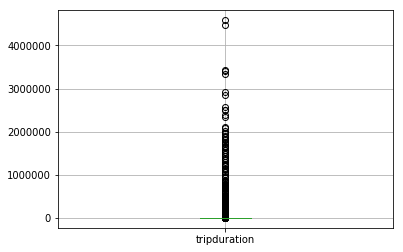

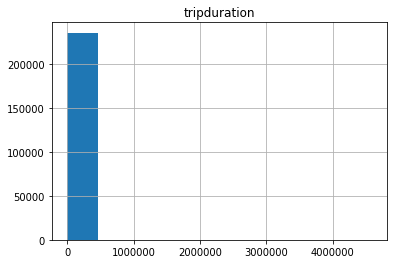

In [8]:
trip_boxplot = raw_df.boxplot(column=['tripduration'])
trip_hist = raw_df.hist(column=['tripduration'])

Number of trips that last longer than 24 hours:252
Proportion of trips that last longer than 24 hours:0.107%
Median trip duration(including outliers): 768.0
Average trip duration(including outliers): 1910.607363730324
Average trip duration(excluding outliers): 1204.0950200149264
Average outliers trip duration: 663071.5873015873
Outliers in trip duration caused a 58.676% difference
Standard Deviation after cleaning: 2334.5847185356943


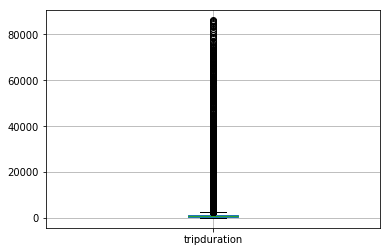

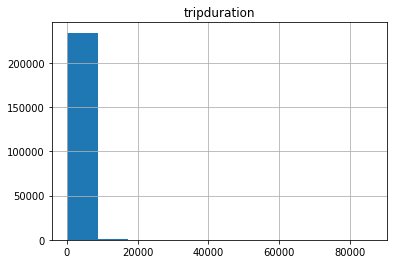

In [24]:
#################################### duration related ####################################
def duration(raw_df, cut_off, cut_off_time):
    filterd_trip_df = raw_df.copy()
    filterd_trip_df = raw_df[raw_df['tripduration']<cut_off]
    number_trip_over_two_hours = len(raw_df)-len(filterd_trip_df)
    print("Number of trips that last longer than " + cut_off_time + ":"+str(number_trip_over_two_hours))
    proportion_trip_over_two_hours = round(number_trip_over_two_hours*100/len(raw_df),3)
    print("Proportion of trips that last longer than " + cut_off_time+":"+str(proportion_trip_over_two_hours)+"%")
    raw_tripduration_median = raw_df['tripduration'].median()
    print("Median trip duration(including outliers): "+str(raw_tripduration_median))
    raw_tripduration_mean = raw_df['tripduration'].mean()
    print("Average trip duration(including outliers): "+str(raw_tripduration_mean))
    filterd_tripduration_mean = filterd_trip_df['tripduration'].mean()
    print("Average trip duration(excluding outliers): "+str(filterd_tripduration_mean))
    outliers_tripduration_mean = raw_df[~raw_df.isin(filterd_trip_df)].dropna()['tripduration'].mean()
    print("Average outliers trip duration: "+str(outliers_tripduration_mean))
    print("Outliers in trip duration caused a "+str(round(100*(raw_tripduration_mean-filterd_tripduration_mean)/filterd_tripduration_mean,3))+"% difference")
    print("Standard Deviation after cleaning: "+str(filterd_trip_df['tripduration'].std()))
    trip_boxplot = filterd_trip_df.boxplot(column=['tripduration'])
    trip_hist = filterd_trip_df.hist(column=['tripduration'])

cut_off = 3600 * 24
cut_off_time = "24 hours"
duration(raw_df, cut_off, cut_off_time)

Even though trips that last longer than 30 days only consist of about 0.1% in total trip, it drastically increases the average trip duration over 50%. Now I will show you the distribution where long trips are taken away

There's still a noticeble extreme scremness in trip duration that is caused by long trip duration. So I will further filter the data frame and only include trips that are shorter than 2 hours, which are a reasonable maximum time for people to ride a bike.  

Number of trips that last longer than two hours:2510
Proportion of trips that last longer than two hours:1.063%
Median trip duration(including outliers): 768.0
Average trip duration(including outliers): 1910.607363730324
Average trip duration(excluding outliers): 1057.5172542236455
Average outliers trip duration: 81294.21075697211
Outliers in trip duration caused a 80.669% difference
Standard Deviation after cleaning: 993.6791114376223


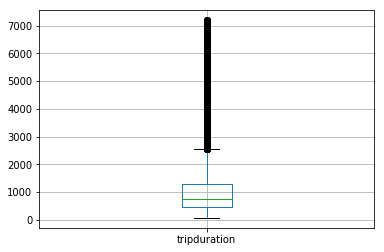

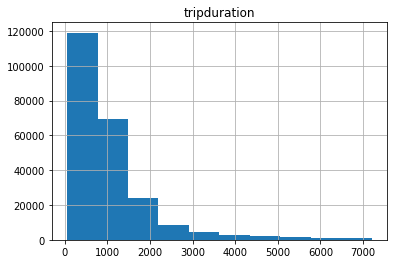

In [16]:
def duration(raw_df, cut_off, cut_off_time):
    filterd_trip_df = raw_df.copy()
    filterd_trip_df = raw_df[raw_df['tripduration']<cut_off]
    number_trip_over_two_hours = len(raw_df)-len(filterd_trip_df)
    print("Number of trips that last longer than " + cut_off_time + ":"+str(number_trip_over_two_hours))
    proportion_trip_over_two_hours = round(number_trip_over_two_hours*100/len(raw_df),3)
    print("Proportion of trips that last longer than " + cut_off_time+":"+str(proportion_trip_over_two_hours)+"%")
    raw_tripduration_median = raw_df['tripduration'].median()
    print("Median trip duration(including outliers): "+str(raw_tripduration_median))
    raw_tripduration_mean = raw_df['tripduration'].mean()
    print("Average trip duration(including outliers): "+str(raw_tripduration_mean))
    filterd_tripduration_mean = filterd_trip_df['tripduration'].mean()
    print("Average trip duration(excluding outliers): "+str(filterd_tripduration_mean))
    outliers_tripduration_mean = raw_df[~raw_df.isin(filterd_trip_df)].dropna()['tripduration'].mean()
    print("Average outliers trip duration: "+str(outliers_tripduration_mean))
    print("Outliers in trip duration caused a "+str(round(100*(raw_tripduration_mean-filterd_tripduration_mean)/filterd_tripduration_mean,3))+"% difference")
    print("Standard Deviation after cleaning: "+str(filterd_trip_df['tripduration'].std()))
    trip_boxplot = filterd_trip_df.boxplot(column=['tripduration'])
    trip_hist = filterd_trip_df.hist(column=['tripduration'])

cut_off = 3600 * 2
cut_off_time = "two hours"
duration(raw_df, cut_off, cut_off_time)

If we include trips that last longer than one hour, the mean is slightly higher than that of only including one hour. Since two hours and one hour both make sense as the maximum normal use of bike, we will just include all trips that are under two hours, which covers over 99% of the data and 3% more data than that of under one hour.

It's also interesting to note that the median of trip reminds constantly around 760 seconds, which is roughly 13 miniutes. Since median is more robust to outliers, it's a better indicator for how long a random rider ride the bike.

From the distribution of trip duration, it's clearly that the distribution is very similar to poisson distribution with a relatively small lambda value. (Try fitting with poisson distribution???)

______________________________________________

Birth year cleaning
Birth year is self-reported, so we can predict that it might contain human errors.

In [25]:
#################################### age related ####################################
filtered_age_df = raw_df.copy()
filtered_age_df['age'] = 2015-raw_df['birth year'] # need to update the year
filtered_age_df['age'].describe()

count    236076.000000
mean         32.614150
std          11.737109
min          13.000000
25%          23.000000
50%          29.000000
75%          46.000000
max         129.000000
Name: age, dtype: float64

From the descriptive stats, I am glab to see that the birth year data is not very bad but it contains missingness because age at 129 is not plausible.
First, I apply a simple filter to observe the number of people age over 100, 90 and 80

Age over 1000:90 ratio: 0.038%
Age over 90:90 ratio: 0.038%
Age over 80:90 ratio: 0.038%
Age over 70:90 ratio: 0.038%


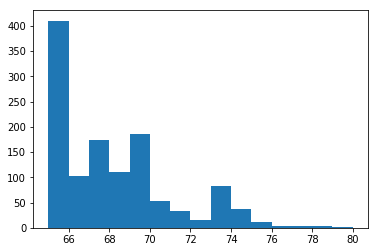

In [26]:
'''
num_over_100 = sum(filtered_age_df['age']>100)
num_over_90 = sum(filtered_age_df['age']>90)
num_over_80 = sum(filtered_age_df['age']>80)
num_over_70 = sum(filtered_age_df['age']>70)
num_age_12 = sum(filtered_age_df['age']==13)
print("Age over 100: "+str(num_over_100)+" ratio: "+str(round(100*num_over_100/len(raw_df),3))+"%")
print("Age over 90: "+str(num_over_90)+"  ratio: "+str(round(100*num_over_90/len(raw_df),3))+"%")
print("Age over 80: "+str(num_over_80)+" ratio: "+str(round(100*num_over_80/len(raw_df),3))+"%")
print("Age over 70: "+str(num_over_70)+" ratio: "+str(round(100*num_over_70/len(raw_df),3))+"%")
print("Age at 13: "+str(num_age_13)+" ratio: "+str(round(100*num_age_13/len(raw_df),3))+"%")
'''


def age_ratio(age_list, filtered_age_df, raw_df):
    for i in age_list:
        num_over = sum(filtered_age_df['age']>100)
        print("Age over " + str(i) + ":" +str(num_over)+" ratio: "+str(round(100*num_over/len(raw_df),3))+"%")
    age_histplot = plt.hist(filtered_age_df[filtered_age_df['age'].between(65,80)]['age'],bins = 15)
    filtered_age_df[filtered_age_df['age'].between(65,80)].groupby('age')['age'].count().to_frame()

age_list = [1000, 90, 80, 70]
age_ratio(age_list, filtered_age_df, raw_df)

It can be observed that there's a huge jump from age 69 to age 70. So, in order to preserve the most data as well as clean the dataset, I will set the cutoff to be 70. Any age that is older than 70 will be assigned as missing age.

In [27]:
#################################### distance related ####################################
def harvensine_distance(row):
    origin = (row['start station latitude'],row['start station longitude'])
    destination = (row['end station latitude'],row['end station longitude'])
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    
    return d

In [143]:
'''
【duration、start、endtime】
        1，Done: 每天（分周一---周五 和 周末）什么时间的user ride时间最长、什么时间的user ride最多
        2，什么月份 or 每个月份哪几天 最长 or 最多 （考虑假期情况）
        3，Done: 每周、每个月中 哪几天的平均trip时长最长
        【data cleaning 】：
        检查duration和start/stop time是否match
        （检查start end time 是否有不合理的input）

'''
raw_df = pd.read_csv('201808-bluebikes-tripdata.csv')
raw_df
import datetime 
import time

time_diff = raw_df.copy()
s1 = '10:33:26'
s2 = '11:15:49' # for example
FMT = '%H:%M:%S'
#time_diff['starttime']  = raw_df['starttime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f"))
#time_diff['stoptime']  = raw_df['stoptime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f"))
# 有case 最后的毫秒没有                                                 
#tdelta = datetime.strptime(s2, FMT) - datetime.strptime(s1, FMT)

time_diff['starttime']  = raw_df['starttime'].apply(lambda x: time.strptime(x.split('.')[0], "%Y-%m-%d %H:%M:%S"))
time_diff['stoptime']  = raw_df['stoptime'].apply(lambda x: time.strptime(x.split('.')[0], "%Y-%m-%d %H:%M:%S"))
time_diff

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1089,"(2018, 8, 1, 0, 0, 9, 2, 213, -1)","(2018, 8, 1, 0, 18, 18, 2, 213, -1)",31,Seaport Hotel - Congress St at Seaport Ln,42.348810,-71.041677,190,Nashua Street at Red Auerbach Way,42.365673,-71.064263,1026,Customer,1969,0
1,578,"(2018, 8, 1, 0, 0, 51, 2, 213, -1)","(2018, 8, 1, 0, 10, 29, 2, 213, -1)",141,Kendall Street,42.363560,-71.082168,225,Cambridge Dept. of Public Works -147 Hampshire...,42.371197,-71.097599,3045,Subscriber,1961,1
2,1037,"(2018, 8, 1, 0, 1, 36, 2, 213, -1)","(2018, 8, 1, 0, 18, 53, 2, 213, -1)",176,Lesley University,42.386748,-71.119019,176,Lesley University,42.386748,-71.119019,2995,Subscriber,1988,0
3,467,"(2018, 8, 1, 0, 2, 49, 2, 213, -1)","(2018, 8, 1, 0, 10, 37, 2, 213, -1)",225,Cambridge Dept. of Public Works -147 Hampshire...,42.371197,-71.097599,179,MIT Vassar St,42.355601,-71.103945,2174,Subscriber,1991,2
4,1618,"(2018, 8, 1, 0, 3, 1, 2, 213, -1)","(2018, 8, 1, 0, 30, 0, 2, 213, -1)",46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,1084,Customer,1969,0
5,646,"(2018, 8, 1, 0, 3, 12, 2, 213, -1)","(2018, 8, 1, 0, 13, 58, 2, 213, -1)",180,Mt Auburn,42.374786,-71.133202,73,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,2850,Subscriber,1993,1
6,393,"(2018, 8, 1, 0, 3, 31, 2, 213, -1)","(2018, 8, 1, 0, 10, 4, 2, 213, -1)",98,Warren St at Chelsea St,42.371848,-71.060292,40,Lewis Wharf at Atlantic Ave,42.363871,-71.050877,2799,Customer,1969,0
7,435,"(2018, 8, 1, 0, 3, 43, 2, 213, -1)","(2018, 8, 1, 0, 10, 59, 2, 213, -1)",93,JFK/UMass T Stop,42.320340,-71.051180,92,University of Massachusetts Boston - Integrate...,42.314507,-71.041269,2386,Subscriber,1984,1
8,381,"(2018, 8, 1, 0, 3, 40, 2, 213, -1)","(2018, 8, 1, 0, 10, 1, 2, 213, -1)",98,Warren St at Chelsea St,42.371848,-71.060292,40,Lewis Wharf at Atlantic Ave,42.363871,-71.050877,1264,Customer,1969,0
9,1535,"(2018, 8, 1, 0, 4, 12, 2, 213, -1)","(2018, 8, 1, 0, 29, 47, 2, 213, -1)",46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,1190,Customer,1969,0


In [98]:
########################### time data cleaning ############################

# 天天error ：） ：） ：） 我再改改

#time_diff_cle = time_diff.copy
#time_diff_cle['starttime']  = raw_df['starttime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f"))
#time_diff_cle['stoptime']  = raw_df['stoptime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f"))

#time_diff_cle['diff'] = raw_df['stoptime'] - raw_df['starttime']
#time_diff_cle

#raw_df['diff'] = raw_df['stoptime'] - raw_df['starttime']
#t1 = pd.to_datetime(raw_df['stoptime'])
#t2 = pd.to_datetime(raw_df['starttime'])
#print (pd.Timedelta(t2 - t1).seconds / 3600.0)
#a = datetime.datetime(2013,12,30,23,59,59)
#b = datetime.datetime(2013,12,31,23,59,59)

On average, people ride bike more towards end of the week
people tends to do longer trips during the weekend for longer trips, butbut ride shorter during weekdays for work


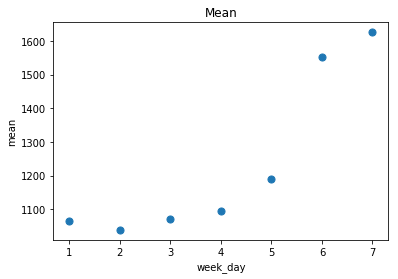

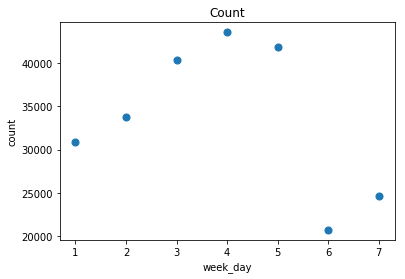

In [145]:
time_diff['week_day']  = time_diff['starttime'].apply(lambda x: int(x.tm_wday)+1)
#time_diff['start'] = time_diff['stoptime'][7]
###############################   每周几骑车的人总时间最长 ###########################
# time_diff['week_day'].max()
time_diff = time_diff.loc[time_diff['tripduration'] < 3600 * 20]
mean_ = time_diff.loc[:,['week_day','tripduration']].groupby('week_day').agg(['mean', 'count']).reset_index()
print('On average, people ride bike more towards end of the week')
mean_.columns = mean_.columns.droplevel(0)
mean_.columns.values[0] = "week_day"
mean_.plot.scatter(x='week_day', y='mean',s=50).set_title('Mean')
mean_.plot.scatter(x='week_day', y='count',s=50).set_title('Count')
print('people tends to do longer trips during the weekend for longer trips, but' 
      + 'but ride shorter during weekdays for work')


#for col in mean_.columns: 
    #print(col)
#mean_

# TODO: analysis the same for month

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


中午和晚上凌晨骑车的人时间最长凌晨时间长--- 因为可能把车停家里了，第二天才还车
早高峰晚高峰骑车的人数最多


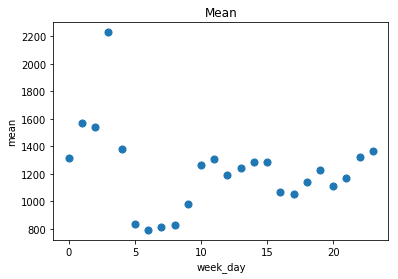

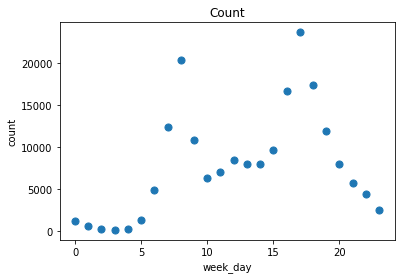

In [146]:

time_diff['hour']  = time_diff['starttime'].apply(lambda x: int(x.tm_hour))

time_hour = time_diff.loc[(time_diff['week_day'] >= 1) & (time_diff['week_day'] <= 5)]
###############################   周一-周五 什么时间骑车的人总时间最长 ###########################
# time_diff['week_day'].max()
# 什么时间的人骑车次数最多
# 什么时间的人骑车时间最长
mean_ = time_hour.loc[:,['hour','tripduration']].groupby('hour').agg(['mean', 'count']).reset_index()

mean_.columns = mean_.columns.droplevel(0)
mean_.columns.values[0] = "week_day"
mean_.plot.scatter(x='week_day', y='mean',s=50).set_title('Mean')
print('中午和晚上凌晨骑车的人时间最长'
      + '凌晨时间长--- 因为可能把车停家里了，第二天才还车')
mean_.plot.scatter(x='week_day', y='count',s=50).set_title('Count')
print('早高峰晚高峰骑车的人数最多')
#print('')
#mean_



长度和平时没差别，估计都是短程
白天有太阳的时候骑车出去玩的人多：normal distribution


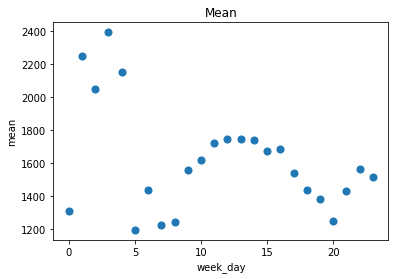

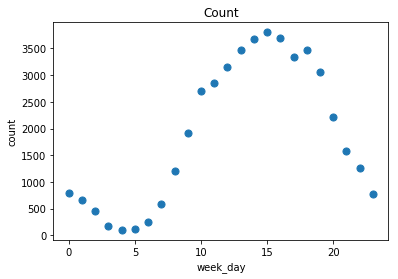

In [147]:
#time_diff['hour']  = time_diff['starttime'].apply(lambda x: int(x.tm_hour))
time_diff = time_diff.loc[time_diff['tripduration'] < 3600 * 20]
time_weekend = time_diff.loc[(time_diff['week_day'] >= 6) & (time_diff['week_day'] <= 7)]
###############################   周一-周五 什么时间骑车的人总时间最长 ###########################
# time_diff['week_day'].max()
# 什么时间的人骑车次数最多
# 什么时间的人骑车时间最长
mean_ = time_weekend.loc[:,['hour','tripduration']].groupby('hour').agg(['mean', 'count']).reset_index()

mean_.columns = mean_.columns.droplevel(0)
mean_.columns.values[0] = "week_day"
mean_.plot.scatter(x='week_day', y='mean',s=50).set_title('Mean')
print('长度和平时没差别，估计都是短程')
mean_.plot.scatter(x='week_day', y='count',s=50).set_title('Count')
print('白天有太阳的时候骑车出去玩的人多：normal distribution')

# TODO: optional: mode of trip duration at different hours

### Missingness
---

Text(0.5, 1.0, 'Mean')

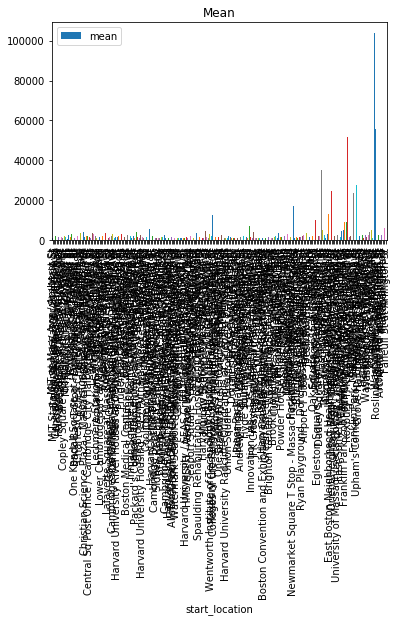

In [99]:
'''
    3：【start_station_id，start_station_name，end_station_id，start_station_name，latitude，longitude 】
        1，每日start 和 end人数最多的地方是哪里
        2，每月start 和 end人数最多的地方是哪里
        3，每年start 和 end人数最多的地方是哪里
        4，结合时间的地点，每天哪个时间段从哪个start到end的人数最多
        【data cleaning】：
        检查相同的id是否match相同的那么，是否match相同的latitude和longitude
'''

Text(0.5, 1.0, 'Mean')

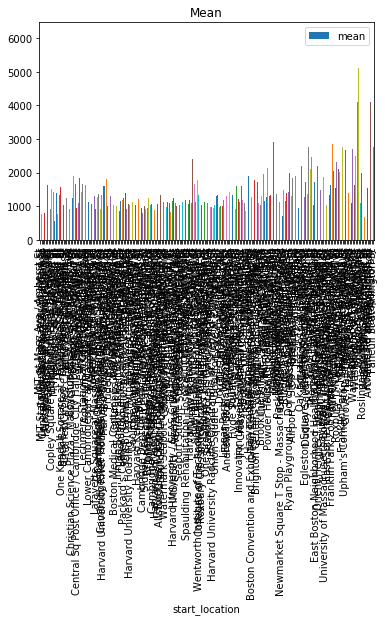

In [148]:
# time_diff.loc[:,['start station id','tripduration']].groupby('hour').agg(['mean', 'count']).reset_index()
##################################### 每天start 人最多的地方 ##################################
time_diff = raw_df.copy()
# time cut off 20 hr
time_diff = time_diff.loc[time_diff['tripduration'] < 3600 * 20]
loc_diff = time_diff.loc[:,['start station name','tripduration' ]].groupby('start station name').agg(['count','mean']).reset_index()
loc_diff.columns = loc_diff.columns.droplevel(0)
loc_diff.columns.values[0] = "start_location"
loc_diff.sort_values('count', ascending=False)
loc_diff.sort_values('count', ascending=False).plot.bar(x='start_location', y='mean').set_title('Mean')
# emmmmm 都是MIT和哈佛的大佬 ：）：）：）
# 反正就是去的频率越少的地方，骑行时间越长  -- 因为那些不是on campus，可能是人家出去玩

Text(0.5, 1.0, 'Mean')

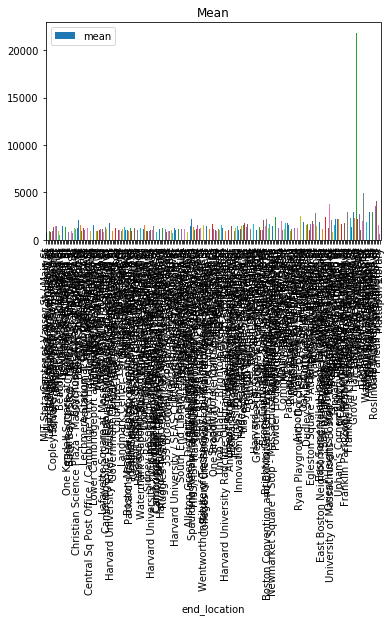

In [128]:
##################################### 每天end 人最多的地方 ##################################
time_diff = raw_df.copy()
time_diff = time_diff.loc[time_diff['tripduration'] < 3600 * 20]
loc_diff = time_diff.loc[:,['end station name','tripduration' ]].groupby('end station name').agg(['count','mean']).reset_index()
loc_diff.columns = loc_diff.columns.droplevel(0)
loc_diff.columns.values[0] = "end_location"
loc_diff.sort_values('count', ascending=False)
loc_diff.sort_values('count', ascending=False).plot.bar(x='end_location', y='mean').set_title('Mean')
# emmmmm 都是MIT和哈佛的大佬 ：）：）：）
# 反正就是去的频率越少的地方，骑行时间越长  -- 因为那些不是on campus，可能是人家出去玩 + 把车停家里忘记还车了

In [132]:
##################################### 每天start 和 end 综合对比 ##################################
ime_diff = raw_df.copy()
time_diff = time_diff.loc[time_diff['tripduration'] < 3600 * 20]
start = time_diff.loc[:,['start station name','tripduration' ]].groupby('start station name').agg(['count','mean']).reset_index()
end = time_diff.loc[:,['end station name','tripduration' ]].groupby('end station name').agg(['count','mean']).reset_index()

start.columns = start.columns.droplevel(0)
start.columns.values[0] = "start_location"
end.columns = end.columns.droplevel(0)
end.columns.values[0] = "end_location"

print(start.sort_values('count', ascending=False).head())
print(end.sort_values('count', ascending=False).head())

print('行 MIT就是nb  ：）')

# TODO：用Folium 综合分析哈佛和mit使用频率 ---》 因为名字不好判断


                              start_location  count         mean
136             MIT at Mass Ave / Amherst St   6133   858.533670
134  MIT Stata Center at Vassar St / Main St   5194   777.097805
190         South Station - 700 Atlantic Ave   5104  1031.255878
48     Central Square at Mass Ave / Essex St   4926   796.630938
149        Nashua Street at Red Auerbach Way   3959  1133.769891
                                end_location  count        mean
134  MIT Stata Center at Vassar St / Main St   6372  708.718927
136             MIT at Mass Ave / Amherst St   5717  855.562533
149        Nashua Street at Red Auerbach Way   5063  979.446771
48     Central Square at Mass Ave / Essex St   4842  822.576002
190         South Station - 700 Atlantic Ave   4609  923.609460
行 MIT就是nb  ：）


In [124]:
time_diff

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1089,2018-08-01 00:00:09.3410,2018-08-01 00:18:18.8890,31,Seaport Hotel - Congress St at Seaport Ln,42.348810,-71.041677,190,Nashua Street at Red Auerbach Way,42.365673,-71.064263,1026,Customer,1969,0
1,578,2018-08-01 00:00:51.6200,2018-08-01 00:10:29.6220,141,Kendall Street,42.363560,-71.082168,225,Cambridge Dept. of Public Works -147 Hampshire...,42.371197,-71.097599,3045,Subscriber,1961,1
2,1037,2018-08-01 00:01:36.5960,2018-08-01 00:18:53.7950,176,Lesley University,42.386748,-71.119019,176,Lesley University,42.386748,-71.119019,2995,Subscriber,1988,0
3,467,2018-08-01 00:02:49.8440,2018-08-01 00:10:37.6340,225,Cambridge Dept. of Public Works -147 Hampshire...,42.371197,-71.097599,179,MIT Vassar St,42.355601,-71.103945,2174,Subscriber,1991,2
4,1618,2018-08-01 00:03:01.6030,2018-08-01 00:30:00.0560,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,1084,Customer,1969,0
5,646,2018-08-01 00:03:12.7570,2018-08-01 00:13:58.9120,180,Mt Auburn,42.374786,-71.133202,73,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,2850,Subscriber,1993,1
6,393,2018-08-01 00:03:31.4550,2018-08-01 00:10:04.9670,98,Warren St at Chelsea St,42.371848,-71.060292,40,Lewis Wharf at Atlantic Ave,42.363871,-71.050877,2799,Customer,1969,0
7,435,2018-08-01 00:03:43.2460,2018-08-01 00:10:59.0680,93,JFK/UMass T Stop,42.320340,-71.051180,92,University of Massachusetts Boston - Integrate...,42.314507,-71.041269,2386,Subscriber,1984,1
8,381,2018-08-01 00:03:40.4420,2018-08-01 00:10:01.5610,98,Warren St at Chelsea St,42.371848,-71.060292,40,Lewis Wharf at Atlantic Ave,42.363871,-71.050877,1264,Customer,1969,0
9,1535,2018-08-01 00:04:12.6130,2018-08-01 00:29:47.8220,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,1190,Customer,1969,0


In [133]:
'''
    4：【bikeid】
        1，（for fun）：哪一个bikeid被使用频率最高
        2，（不那么相关）：在哪一个地点，bikeid交换的频率最低（基本车就放在那里攒灰）
        【data cleaning】
        检查相同时间段，同一个bikeid是否在被不同的user骑
        检查相同时间段，同一个bikeid是否停在不同的地方
'''

In [142]:
##################################### 哪个地方bike流动率最低 ##################################
time_diff = raw_df.copy()
time_diff = time_diff.loc[time_diff['tripduration'] < 3600 * 20]
end = time_diff.loc[:,['end station name','tripduration' ,'bikeid']].groupby('end station name').agg({'bikeid': pd.Series.nunique}).reset_index()
print(end.sort_values('bikeid', ascending=False).head())
print(end.sort_values('bikeid').head())

                            end station name  bikeid
134  MIT Stata Center at Vassar St / Main St    2277
136             MIT at Mass Ave / Amherst St    2112
149        Nashua Street at Red Auerbach Way    2098
48     Central Square at Mass Ave / Essex St    2025
190         South Station - 700 Atlantic Ave    1999
                       end station name  bikeid
141                    Mattapan Library       1
142                     Mattapan T Stop       3
84           Faneuil St at Arlington St       3
172  Roslindale Village - Washington St       4
22           Blue Hill Ave at Almont St       6


### Hypothesis Test
---